<a href="https://colab.research.google.com/github/mjshafer-1/ECO6100/blob/master/Star_Wars_Survey_Shafer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
star_wars = pd.read_csv('https://github.com/fivethirtyeight/data/raw/master/star-wars-survey/StarWars.csv',encoding='ISO-8859-1')

In [38]:
print(star_wars.columns)
print('\n')
print(star_wars.info())

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [39]:
print(star_wars['RespondentID'].isnull().sum())
star_wars = star_wars[star_wars['RespondentID'].notnull()]
print(star_wars['RespondentID'].isnull().sum())


1
0


In [40]:
yes_no = {'Yes':True,'No':False}
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] =star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [41]:
for c in star_wars.columns[3:9]:
  print(star_wars[c].value_counts())

Star Wars: Episode I  The Phantom Menace    673
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64
Star Wars: Episode II  Attack of the Clones    571
Name: Unnamed: 4, dtype: int64
Star Wars: Episode III  Revenge of the Sith    550
Name: Unnamed: 5, dtype: int64
Star Wars: Episode IV  A New Hope    607
Name: Unnamed: 6, dtype: int64
Star Wars: Episode V The Empire Strikes Back    758
Name: Unnamed: 7, dtype: int64
Star Wars: Episode VI Return of the Jedi    738
Name: Unnamed: 8, dtype: int64


In [42]:
movie_map = {'Star Wars: Episode I  The Phantom Menace': True,
             'Star Wars: Episode II  Attack of the Clones': True,
             'Star Wars: Episode III  Revenge of the Sith': True,
             'Star Wars: Episode IV  A New Hope': True,
             'Star Wars: Episode V The Empire Strikes Back':True,
             'Star Wars: Episode VI Return of the Jedi': True,
             np.NaN:False}
for c in star_wars.columns[3:9]:
  star_wars[c] = star_wars[c].map(movie_map)

In [43]:
col_map = {'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
           'Unnamed: 4': 'seen_2',
           'Unnamed: 5': 'seen_3',
           'Unnamed: 6': 'seen_4',
           'Unnamed: 7':'seen_5',
           'Unnamed: 8': 'seen_6'}
star_wars.rename(col_map,axis=1,inplace=True)
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 1 to 1186
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   float64
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1186 non-null   bool   
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          836 non-null    object 
 3   seen_1                      

In [44]:
for c in star_wars.columns[9:15]:
    star_wars[c] = star_wars[c].astype(float)
col2_map = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
            'Unnamed: 10': 'ranking_2',
            'Unnamed: 11': 'ranking_3',
            'Unnamed: 12': 'ranking_4',
            'Unnamed: 13': 'ranking_5',
            'Unnamed: 14': 'ranking_6'}
star_wars.rename(col2_map,axis=1,inplace=True)
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 1 to 1186
Data columns (total 38 columns):
 #   Column                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                          --------------  -----  
 0   RespondentID                                                                                                    1186 non-null   float64
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                    1186 non-null   bool   
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                           836 non-null    object 
 3   seen_1                                                                                                          1186 non-null   bool   
 4   seen_2                                    

Text(0.5, 1.0, '# of Viewers')

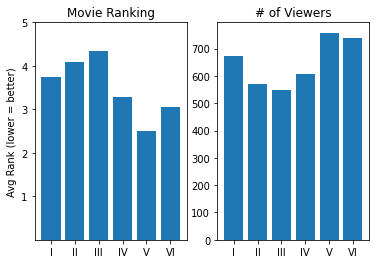

In [45]:
means = star_wars.iloc[:,9:15].mean()
views = star_wars.iloc[:,3:9].sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.bar(star_wars.columns[9:15], height=means)
ax2.bar(star_wars.columns[9:15],height=views)

ax1.set_xticklabels(['I', 'II', 'III', 'IV', 'V', 'VI'])
ax1.set_yticks([1,2,3,4,5])
ax1.set_title('Movie Ranking')
ax1.set_ylabel('Avg Rank (lower = better)')
ax2.set_xticklabels(['I', 'II', 'III', 'IV', 'V', 'VI'])
ax2.set_title('# of Viewers')


## Movie Rankings: General ##
We can see i the above chart that the best ranked Star Wars movie is Episode V: The Empire Strikes Back, which is also the most viewed movie in the list. In fact, it appears that there is some relationship between the number of respondents who have seen the movie and the rank that movie is given.  This may be because more people will watch the movies considered the best and ignore the others.

In [46]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

Text(0.5, 1.0, '# of Viewers (Males)')

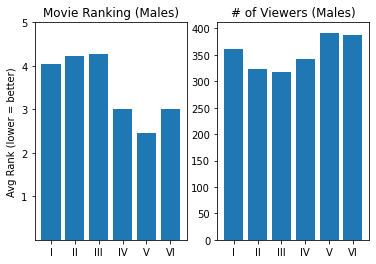

In [47]:
means_m = males.iloc[:,9:15].mean()
views_m = males.iloc[:,3:9].sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.bar(males.columns[9:15], height=means_m)
ax2.bar(males.columns[9:15],height=views_m)

ax1.set_xticklabels(['I', 'II', 'III', 'IV', 'V', 'VI'])
ax1.set_yticks([1,2,3,4,5])
ax1.set_title('Movie Ranking (Male)')
ax1.set_ylabel('Avg Rank (lower = better)')
ax2.set_xticklabels(['I', 'II', 'III', 'IV', 'V', 'VI'])
ax2.set_title('# of Viewers (Male)')

Text(0.5, 1.0, '# of Viewers (Females)')

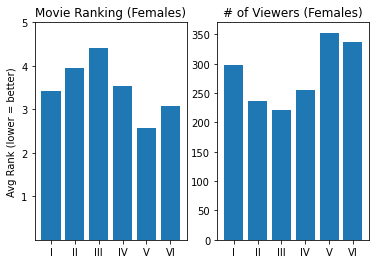

In [48]:
means_f = females.iloc[:,9:15].mean()
views_f = females.iloc[:,3:9].sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.bar(females.columns[9:15], height=means_f)
ax2.bar(females.columns[9:15],height=views_f)

ax1.set_xticklabels(['I', 'II', 'III', 'IV', 'V', 'VI'])
ax1.set_yticks([1,2,3,4,5])
ax1.set_title('Movie Ranking (Female)')
ax1.set_ylabel('Avg Rank (lower = better)')
ax2.set_xticklabels(['I', 'II', 'III', 'IV', 'V', 'VI'])
ax2.set_title('# of Viewers (Female)')

## Movie Rankings: Men & Women ##

Based on the above charts, we can see that the general rankings are similar between men and women. The main difference is that men tend to rank the original trilogy (IV - VI) higher than the prequels (I - III), while women rank Episodes I & IV similarly. Furthermore, the differene between the most and least watched movies is less for men than for women.

In [49]:
fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
nonfans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]

Text(0.5, 1.0, '# of Viewers (Fans)')

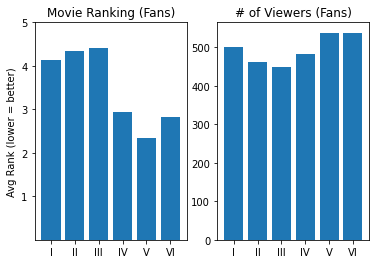

In [50]:
means_fa = fans.iloc[:,9:15].mean()
views_fa = fans.iloc[:,3:9].sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.bar(fans.columns[9:15], height=means_fa)
ax2.bar(fans.columns[9:15],height=views_fa)

ax1.set_xticklabels(['I', 'II', 'III', 'IV', 'V', 'VI'])
ax1.set_yticks([1,2,3,4,5])
ax1.set_title('Movie Ranking (Fan)')
ax1.set_ylabel('Avg Rank (lower = better)')
ax2.set_xticklabels(['I', 'II', 'III', 'IV', 'V', 'VI'])
ax2.set_title('# of Viewers (Fan)')

Text(0.5, 1.0, '# of Viewers (Non-Fans)')

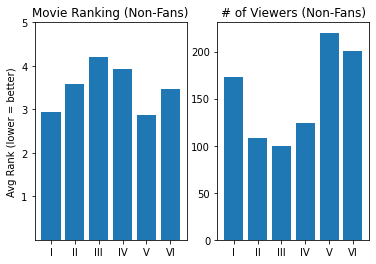

In [51]:
means_nf = nonfans.iloc[:,9:15].mean()
views_nf = nonfans.iloc[:,3:9].sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.bar(nonfans.columns[9:15], height=means_nf)
ax2.bar(nonfans.columns[9:15],height=views_nf)

ax1.set_xticklabels(['I', 'II', 'III', 'IV', 'V', 'VI'])
ax1.set_yticks([1,2,3,4,5])
ax1.set_title('Movie Ranking (Non-Fan)')
ax1.set_ylabel('Avg Rank (lower = better)')
ax2.set_xticklabels(['I', 'II', 'III', 'IV', 'V', 'VI'])
ax2.set_title('# of Viewers (Non-Fan)')

## Movie Rankings: Fans & Non-Fans ##
Based on the above charts, self-identified fans prefer the original trilogy and many have seen all of the movies. On the other side, non-fans have very different rankings and less uniform watch histories. In particular Episode I has the same average rank as Episode V, while fans rank Episode I far worse. The prequels can be contentious among fans, and that must not extend to the non-fans surveyed. 

In [52]:
trek = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "Yes"]
non_trek = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "No"]

Text(0.5, 1.0, '# of Viewers (ST Fans)')

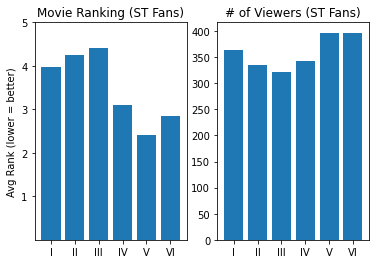

In [53]:
means_t = trek.iloc[:,9:15].mean()
views_t = trek.iloc[:,3:9].sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.bar(trek.columns[9:15], height=means_t)
ax2.bar(trek.columns[9:15],height=views_t)

ax1.set_xticklabels(['I', 'II', 'III', 'IV', 'V', 'VI'])
ax1.set_yticks([1,2,3,4,5])
ax1.set_title('Movie Ranking (ST Fan)')
ax1.set_ylabel('Avg Rank (lower = better)')
ax2.set_xticklabels(['I', 'II', 'III', 'IV', 'V', 'VI'])
ax2.set_title('# of Viewers (ST Fan)')

Text(0.5, 1.0, '# of Viewers (Not ST Fans)')

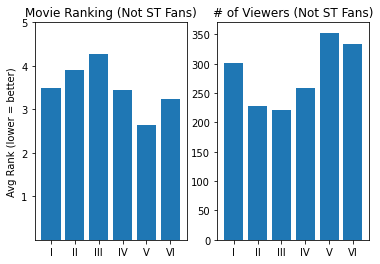

In [54]:
means_nt = non_trek.iloc[:,9:15].mean()
views_nt = non_trek.iloc[:,3:9].sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.bar(non_trek.columns[9:15], height=means_nt)
ax2.bar(non_trek.columns[9:15],height=views_nt)

ax1.set_xticklabels(['I', 'II', 'III', 'IV', 'V', 'VI'])
ax1.set_yticks([1,2,3,4,5])
ax1.set_title('Movie Ranking (Not ST Fan)')
ax1.set_ylabel('Avg Rank (lower = better)')
ax2.set_xticklabels(['I', 'II', 'III', 'IV', 'V', 'VI'])
ax2.set_title('# of Viewers (Not ST Fan)')

## Movie Rankings: Star Trek Fans ##
The rankings between self-identified Star Trek fans and non-Star Trek fans tend to be roughly the same. Non-Star Trek fans tend to have less of a difference between the original trilogy and the prequels. Star Trek fans were also more likely to have seen the movies than non-Star Trek fans. Since both Star Wars and Star Trek are major sci-fi series, it is easy to understand there would be a fair amount of overlap in terms of viewership.

In [55]:
star_wars['Age'].value_counts(dropna=False)

45-60    291
> 60     269
30-44    268
18-29    218
NaN      140
Name: Age, dtype: int64

In [56]:
a18 = star_wars[star_wars['Age'] == '18-29']
a30 = star_wars[star_wars['Age'] == '30-44']
a45 = star_wars[star_wars['Age'] == '45-60']
a60 = star_wars[star_wars['Age'] == '> 60']

Text(0.5, 1.0, 'Movie Ranking (> 60)')

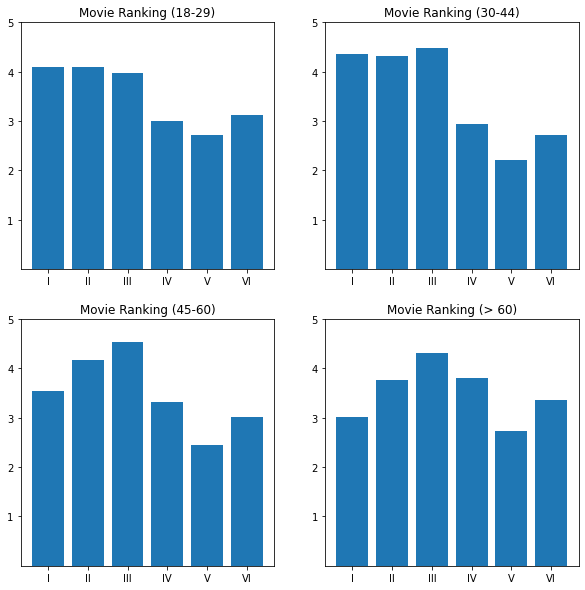

In [57]:
means_18 = a18.iloc[:,9:15].mean()
means_30 = a30.iloc[:,9:15].mean()
means_45 = a45.iloc[:,9:15].mean()
means_60 = a60.iloc[:,9:15].mean()

fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.bar(a18.columns[9:15],height=means_18)
ax2.bar(a30.columns[9:15],height=means_30)
ax3.bar(a45.columns[9:15],height=means_45)
ax4.bar(a60.columns[9:15],height=means_60)


ax1.set_xticklabels(['I', 'II', 'III', 'IV', 'V', 'VI'])
ax1.set_yticks([1,2,3,4,5])
ax1.set_title('Movie Ranking (18-29)')
ax2.set_xticklabels(['I', 'II', 'III', 'IV', 'V', 'VI'])
ax2.set_yticks([1,2,3,4,5])
ax2.set_title('Movie Ranking (30-44)')
ax3.set_xticklabels(['I', 'II', 'III', 'IV', 'V', 'VI'])
ax3.set_yticks([1,2,3,4,5])
ax3.set_title('Movie Ranking (45-60)')
ax4.set_xticklabels(['I', 'II', 'III', 'IV', 'V', 'VI'])
ax4.set_yticks([1,2,3,4,5])
ax4.set_title('Movie Ranking (> 60)') 

## Movie Rankings by Age ##
The above charts show the rankings for each film by age group provided in the survey. We can see that between all of the age groups Episode V is still ranked the highest, although not always by much. Surprisingly, it seems that the >60 group ranks the original trilogy and the prequels relatively close, while the divide widens with younger groups. 

One would think at first that nostalgia may have an effect on rankings; that is, we would expect to see more favorable rankings for movies one would have seen as a child or young adult. However, if this were the case we would expect to see just the opposite of what is shown above. It might be that those who were fans during the original trilogy see both trilogies as contemporary films, while younger viewers see the original trilogy as classics. This generational difference may explain why younger viewers rank Episode I the lowest, while the oldest viewers rank it the second best.

# Conclusion #
Across all of the groups we have analyzed, we can see that the most well liked Star Wars movie is Episode V: The Empire Strikes Back. It is also among the most seen across all groups. Furthermore, we can see that certain groups have a preference for the original trilogy (Episodes IV, V, & VI) while other groups are more balanced among all six films. It will be interesting to analyze the data when information on the newest trilogy is available. 